In [1]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
import string
import matplotlib.cm as cm
import os
import scipy

Populating the interactive namespace from numpy and matplotlib


##Seccion 12.1

###Ejercicio 1-FFT

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


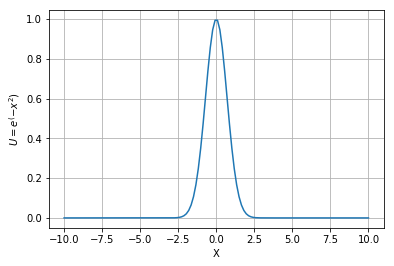

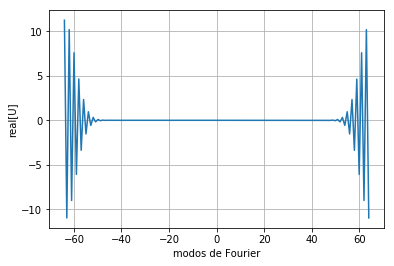

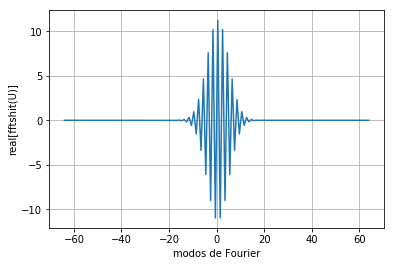

In [2]:
L=20
n=128
x2=np.linspace(-L/2,L/2,n)
x3=np.linspace(-n/2,n/2,n)
x=x2[0:n]
u=np.exp(-x*x)
ut=np.fft.fft(u)
utshift=np.fft.fftshift(ut)

plt.figure(1)
plt.plot(x,u)
plt.grid()
pylab.ylabel("$U=e^(-x^2)$")
pylab.xlabel("X")
plt.show

plt.figure(2)
plt.plot(x3,ut)
pylab.ylabel("real[U]")
pylab.xlabel("modos de Fourier")
plt.grid()
plt.show

plt.figure(3)
plt.plot(x3,utshift)
pylab.ylabel("real[fftshit(U)]")
pylab.xlabel("modos de Fourier")
plt.grid()
plt.show()                 


###Ejercicio 2-FFT vs diferencias finitas

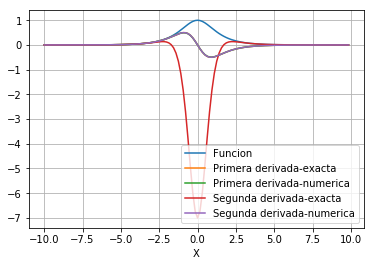

In [3]:

L=20
n=128
x2=np.linspace(-L/2,L/2,n+1)
x=x2[0:n]
dx=x[1]-x[0]
u=1/np.cosh(x)
ut=np.fft.fft(u)
arr1=np.linspace(0,((n/2)-1),64)
arr2=np.linspace(((-n/2)-1),-1,64)
arreg=np.concatenate((arr1,arr2),axis=0)
k=(2*scipy.pi/L)*arreg


#FFT calculation of derivatives
ut1=1j*k*ut
ut2=-k*k*ut
u1=np.real(np.fft.ifft(ut1))
u2=np.real(np.fft.ifft(ut2))
u1exact=(-1/np.cosh(x))*np.tanh(x)
u2exact=(1/np.cosh(x))-((2/np.cosh(x))**3)
#Finite difference calculation of first derivative
#2nd-order accurate
ux=[]
ux.append((-3*u[0]+4*u[1]-u[2]/(2*dx)))
longit=(np.linspace(1,n-2,126)).astype(int)
for j in longit:
 ux.append((u[j+1]-u[j-1])/(2*dx))
ux.append((3*u[n-1]-4*u[n-2]+u[n-3])/(2*dx));

#4th-order accurate
ux2=[]
ux2.append((-3*u[0]+4*u[1]-u[2])/(2*dx))
ux2.append((-3*u[1]+4*u[2]-u[3])/(2*dx))
longit2=(np.linspace(2,n-3,124)).astype(int)
for j in longit2:
 ux2.append((-u[j+2]+8*u[j+1]-8*u[j-1]+u[j-2])/(12*dx))
ux2.append((3*u[n-2]-4*u[n-3]+u[n-4])/(2*dx))      
ux2.append((3*u[n-1]-4*u[n-2]+u[n-3])/(2*dx))


plt.figure(1)
plt.plot(x,u,label='Funcion')
plt.plot(x,u1exact,label='Primera derivada-exacta')
plt.plot(x,ux,label='Primera derivada-numerica')
plt.plot(x,u2exact,label='Segunda derivada-exacta')
plt.plot(x,ux2,label='Segunda derivada-numerica')
pylab.legend(loc='lower right') 
pylab.xlabel("X")
plt.grid()
plt.show()       


##Seccion 12.2

###Ejercicio 1-Señal con ruido

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


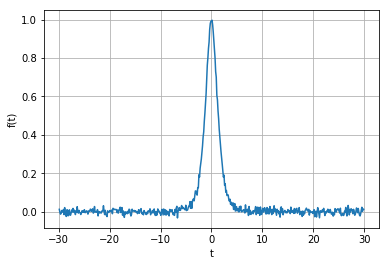

In [4]:
L=30
n=512
t2=np.linspace(-L,L,n+1)
t=t2[0:n]
arr1=np.linspace(0,((n/2)-1),256)
arr2=np.linspace(((-n/2)-1),-1,256)
arreg=np.concatenate((arr1,arr2),axis=0)
k=(2*scipy.pi/(2*L))*arreg
u=1/np.cosh(t)
noise=1;
ut=np.fft.fft(u)
utn=ut+noise*(np.random.rand(n)+(1j*np.random.rand(n)))
un=np.fft.ifft(utn)



plt.figure(1)
plt.plot(t[1:],un[1:])
pylab.xlabel("t")
pylab.ylabel("f(t)")
plt.grid()
plt.show()  

###Ejercicio 2-Filtro 

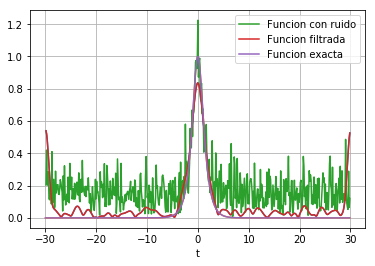

In [5]:
noise=10;
unt=ut+noise*(np.random.rand(n)+(1j*np.random.rand(n)))
un=np.fft.ifft(unt);


fil=np.exp(-0.2*(k)**2);
unft=fil*unt;
unf=ifft(unft);
plot(t[1:],abs(unf)[1:])
plot(t,u)

plt.figure(1)
plot(t[1:],abs(un)[1:],label='Funcion con ruido')
plot(t[1:],abs(unf)[1:],label='Funcion filtrada')
plot(t,u,label='Funcion exacta')
pylab.legend(loc='upper right') 
pylab.xlabel("t")
plt.grid()
plt.show()     


##Seccion 12.2

###Ejercicio 1-Radar

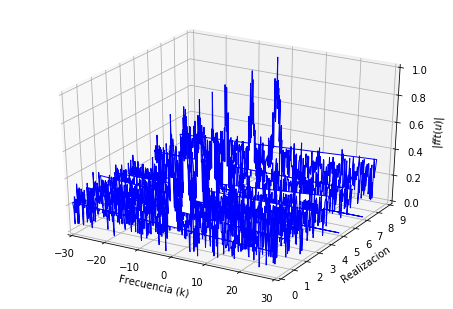

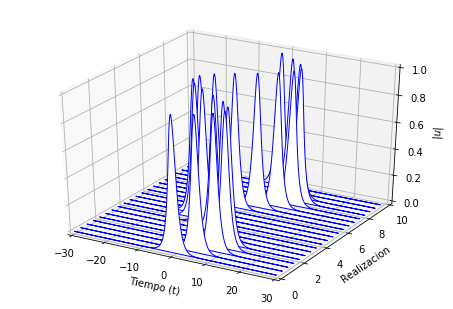

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:81: ComplexWarning: Casting complex values to real discards the imaginary part
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:84: ComplexWarning: Casting complex values to real discards the imaginary part
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: ComplexWarning: Casting complex values to real discards the imaginary part


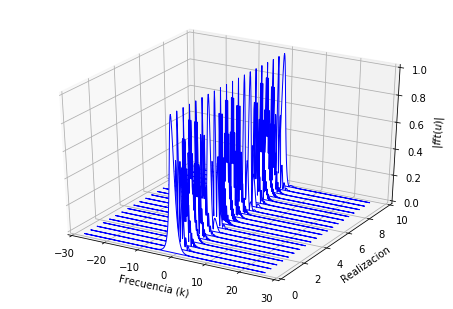

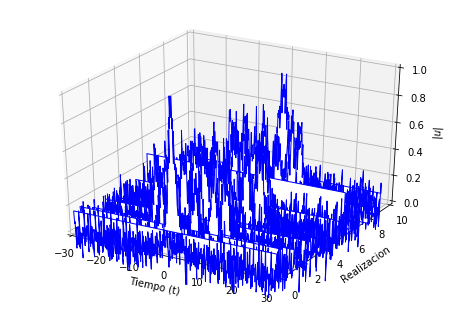

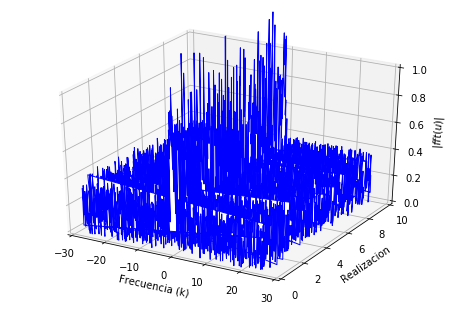

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot
from matplotlib.collections import PolyCollection

L=30
n=512
t2=np.linspace(-L,L,n+1)
t=t2[0:n]
arr1=np.linspace(0,((n/2)-1),256)
arr2=np.linspace(((-n/2)-1),-1,256)
arreg=np.concatenate((arr1,arr2),axis=0)
k=(2*scipy.pi/(2*L))*arreg
ks=np.fft.fftshift(k)
noise=10
ave = numpy.zeros(shape=(4,n))
dat = numpy.zeros(shape=(100,n))

realize=[1,2,5,100];
tamanio=[0,1,2,3]
for jj in tamanio:
 u=1/np.cosh(t); 
 ut=np.fft.fft(u)
 actual=realize[jj]
 vectorj=(np.linspace(0,actual-1/actual)).astype(int)
 aveactual=np.zeros(n)
 for j in vectorj:
  utn=ut+noise*(np.random.rand(n)+(1j*np.random.rand(n)))
  aveactual=aveactual+utn
  dat[j]=abs(np.fft.fftshift(utn))/max(abs(utn));
 ave[jj]=abs((np.fft.fftshift(aveactual))/realize[jj])
    

slc = np.arange(0, 9, 1)
verts = []
for i in slc:
  verts.append(list(zip(t,dat[i,:])))

fig=plt.figure()
ax = Axes3D(fig)
poly = PolyCollection(verts, facecolors=(1,1,1,1), edgecolors=(0,0,1,1))
ax.add_collection3d(poly, zs=slc, zdir='y')
ax.set_xlim(-30,30)
ax.set_ylim(0,9)
ax.set_xlabel('Frecuencia (k)')
ax.set_ylabel('Realizacion')
ax.set_zlabel('$|fft(u)|$')
ax.set_zlim(0,1)
pyplot.show()

slc = np.arange(0, 10, 0.5)
T, S = np.meshgrid(t, slc)
K, S = np.meshgrid(k, slc)
U = 1./np.cosh(T - 10. * np.sin(S)) * np.exp(1j * 0. * T)
nslices=len(slc)


verts2 = []
for i in range(nslices):
  verts2.append(list(zip(T[i], U.real[i])))
fig2=plt.figure()
ax2 = Axes3D(fig2)
poly2 = PolyCollection(verts2, facecolors=(1,1,1,1), edgecolors=(0,0,1,1))
ax2.add_collection3d(poly2, zs=slc, zdir='y')
ax2.set_xlim(-30,30)
ax2.set_xlabel('Tiempo (t)')
ax2.set_ylabel('Realizacion')
ax2.set_zlabel('$|u|$')
ax2.set_ylim(0,10)
ax.set_zlim(0,1)
pyplot.show()

Ut = numpy.zeros(shape=(20,n))
Kp = numpy.zeros(shape=(20,n))
Utp = numpy.zeros(shape=(20,n))
Utn = numpy.zeros(shape=(20,n))
Utnp = numpy.zeros(shape=(20,n))
Un = numpy.zeros(shape=(20,n))
noise=10
tamanio=(np.linspace(0,19,20)).astype(int)
for j in tamanio:
 Ut[j]=np.fft.fft(U[j])
 Kp[j]=np.fft.fftshift(K[j])
 Utp[j]=np.fft.fftshift(Ut[j])
 Utn[j]=Ut[j]+noise*(np.random.rand(n)+(1j*np.random.rand(n)));
 Utnp[j]=np.fft.fftshift(Utn[j])/max(abs(Utn[j]));
 Un[j]=np.fft.ifft(Utn[j]);

    
verts3 = []
for i in range(nslices):
  verts3.append(list(zip(k, abs(Ut[i])/max(abs(Ut[i])))))

fig3=plt.figure()
ax3 = Axes3D(fig3)
poly3 = PolyCollection(verts3, facecolors=(1,1,1,1), edgecolors=(0,0,1,1))
ax3.add_collection3d(poly3, zs=slc, zdir='y')
ax3.set_xlim(-30,30)
ax3.set_ylim(0,10)
ax3.set_zlim(0,1)
ax3.set_xlabel('Frecuencia (k)')
ax3.set_ylabel('Realizacion')
ax3.set_zlabel('$|fft(u)|$')
pyplot.show()
verts4 = []
for i in range(nslices):
  verts4.append(list(zip(T[i,1:],Un[i,1:])))

fig4=plt.figure()
ax4 = Axes3D(fig4)
poly4 = PolyCollection(verts4, facecolors=(1,1,1,1), edgecolors=(0,0,1,1))
ax4.add_collection3d(poly4, zs=slc, zdir='y')
ax4.set_xlim(-30,30)
ax4.set_ylim(0,10)
ax4.set_zlim(0,1)
ax4.set_xlabel('Tiempo (t)')
ax4.set_ylabel('Realizacion')
ax4.set_zlabel('$|u|$')
pyplot.show()


verts5 = []
for i in range(nslices):
  verts5.append(list(zip(k[1:], abs(Utn[i,1:])/max(abs(Ut[i,1:])))))

fig5=plt.figure()
ax5 = Axes3D(fig5)
poly5 = PolyCollection(verts5, facecolors=(1,1,1,1), edgecolors=(0,0,1,1))
ax5.add_collection3d(poly5, zs=slc, zdir='y')
ax5.set_xlim(-30,30)
ax5.set_ylim(0,10)
ax5.set_zlim(0,1)
ax5.set_xlabel('Frecuencia (k)')
ax5.set_ylabel('Realizacion')
ax5.set_zlabel('$|fft(u)|$')
pyplot.show()

##Ejercicio practico
###ejemplificacion del teorema de Nyquist

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


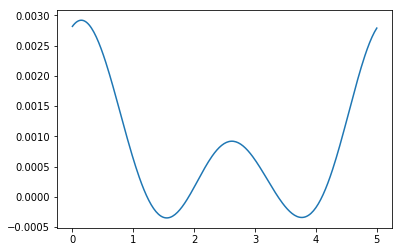

In [7]:
L=5
n1=32
n2=128
n3=256
n4=4096
noise=0.5



t1=np.linspace(0,L,n1)
t2=np.linspace(0,L,n2)
t3=np.linspace(0,L,n3)
t4=np.linspace(0,L,n4)
u1=np.sin(t1*10*(2*np.pi))
u2=np.sin(t2*10*(2*np.pi))
u3=np.sin(t3*10*(2*np.pi))
u4=np.sin(t4*10*(2*np.pi))

arreg1=np.concatenate((np.linspace(0,((n1/2)-1),n1/2),np.linspace(((-n1/2)-1),-1,n1/2)),axis=0)
k1=(2*scipy.pi/L)*arreg1

arreg2=np.concatenate((np.linspace(0,((n2/2)-1),n2/2),np.linspace(((-n2/2)-1),-1,n2/2)),axis=0)
k2=(2*scipy.pi/L)*arreg2

arreg3=np.concatenate((np.linspace(0,((n3/2)-1),n3/2),np.linspace(((-n3/2)-1),-1,n3/2)),axis=0)
k3=(2*scipy.pi/L)*arreg3

ut1=np.fft.fft(u1)
utn1=ut1+noise*(np.random.rand(n1)+(1j*np.random.rand(n1)))
ut2=np.fft.fft(u2)
utn2=ut2+noise*(np.random.rand(n2)+(1j*np.random.rand(n2)))
ut3=np.fft.fft(u3)
utn3=ut3+noise*(np.random.rand(n3)+(1j*np.random.rand(n3)))


un1=np.fft.ifft(utn1);
un2=np.fft.ifft(utn2);
un3=np.fft.ifft(utn3);



fil1=np.exp(-0.2*(k1)**2);
unft1=fil1*utn1;
unf1=ifft(unft1);



fil1=np.exp(-0.2*(k1)**2);
unft1=fil1*utn1;
unf1=ifft(unft1);


fil3=np.exp(-0.2*(k3)**2);
unft3=fil3*utn3;
unf3=ifft(unft3);
plot(t3,unf3)
